# Exercise No. 1

## Count Amino acid propensity in human proteome

In [2]:
from collections import Counter
import csv
import matplotlib.pyplot as plt

In [3]:
def fasta_file(path, output_file_name):

    as_seq = []
    with open(path) as f:
        for line in f:
            as_seq.append(line)
    
    identifier = []
    one_string = ""
    
    for i, line in enumerate(as_seq):
        line = line.replace("\n","")
        as_seq[i] = line
        if line.startswith(">"): 
            identifier_line = as_seq.pop(i)
            identifier.append(identifier_line)
        else:
            one_string += line
    
    counts = dict(Counter(one_string))

    with open(output_file_name, "w", newline='') as output:
        w = csv.writer(output) 
        for row in counts.items():
            w.writerow(row) 



In [1]:
def plot_hist(path, png_filename, hist_title):
    with open(path) as f:
        reader = csv.reader(f)
        as_counts = dict(reader)
        for keys in as_counts:
            as_counts[keys] = int(as_counts[keys])
        plt.bar(as_counts.keys(), as_counts.values())
        plt.suptitle(hist_title)
        plt.savefig(png_filename, dpi = 400)


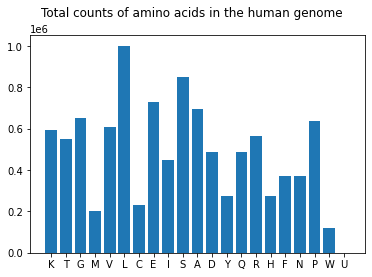

In [7]:
path_fasta = "uniprot-filtered-reviewed_yes+AND+organism__Homo+sapiens+(Human)+[96--.fasta"
path_csv = "human_aminoacids_counts.csv"
path_png = "human_hist.png"
fasta_file(path_fasta, path_csv)
plot_hist(path_csv, path_png, "Total counts of amino acids in the human genome")

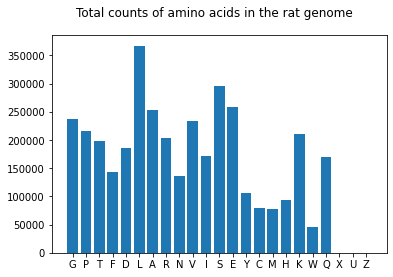

In [8]:
path_fasta = "uniprot-filtered-organism__Rattus+norvegicus+(Rat)+[10116]_+AND+re--.fasta"
path_csv = "rat_aminoacids_counts.csv"
path_png = "rat_hist.png"
fasta_file(path_fasta, path_csv)
plot_hist(path_csv, path_png, "Total counts of amino acids in the rat genome")

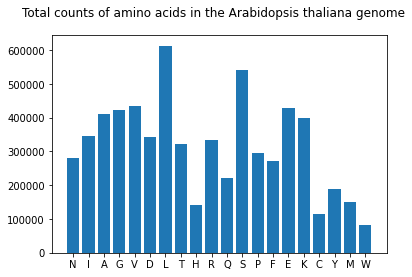

In [9]:

path_fasta = "uniprot-filtered-organism__Arabidopsis+thaliana+(Mouse-ear+cress)+[370--.fasta"
path_csv = "plant_aminoacids_counts.csv"
path_png = "plant_hist.png"
fasta_file(path_fasta, path_csv)
plot_hist(path_csv, path_png, "Total counts of amino acids in the Arabidopsis thaliana genome")
